# **FLICKFLARE**


![FlickFlareLogo](Desktop/moringa/DataScience%20Projects%202024/ml-latest-small/Phase-4-Project/Images_Movie_Recommendation_System/FlickFlareLogo.PNG)









### **Project Phase 4**

### **Authors**
#### Kelvin Mwaura
#### Abigael Nyabaga
#### Prossy Nansubuga

# **Movie Recommender System**
## **Overview: FlickFlare**

FlickFlare is a cutting-edge movie streaming platform designed to bring a diverse and expansive collection of films directly to your screen. Whether you're a fan of classic cinema, indie gems, or the latest blockbuster hits, FlickFlare has something for everyone.

To enhance user satisfaction and ensure that our movie recommendations align with user interests, we are introducing a sophisticated movie recommender system. This system will leverage user ratings and genre preferences to suggest the top 5 movies tailored to individual tastes.

## **Business Understanding**
### **Problem Statement**

FlickFlare, a movie streaming company, received feedback from users on the Google Play Store indicating that the movies recommended to them did not match their interests, leading to customer dissatisfaction.

To address this issue, FlickFlare has approached us, RODATA-a data analytics company, to build a movie recommender system. This system will aid in suggesting the top 5 movies to users based on their ratings and preferred genres.

## **Objectives**

###  **Main Objective**

    To build a movie recommender system that suggests top movies to streaming users based on movie ratings and preferred genres.

### Specific Objectives
1. **Recommendation Accuracy**: Design an algorithm to precisely identify and recommend the top five movies that match user ratings and preferred genres, ensuring high relevance to individual preferences.
2. **Boosting User Interaction**: Develop a recommendation system aimed at significantly enhancing user engagement by providing personalized movie suggestions, leading to increased interaction and longer viewing times.
3. **Customized Movie Suggestions**: Create tailored recommendations that align with each user's unique interests and viewing patterns.
4. **Improving Recommendation Precision**: Enhance the algorithm's accuracy over time by incorporating user feedback and continuously refining the recommendation process to better match user preferences.

### **Metric for Success**
To achieve the success metrics for the recommendation system, below is structured approach that we shall use to ensure we meet both the Recommendation Accuracy and User Interaction goals

1. **Recommendation Accuracy**
   
    Goal: Achieve at least 80% accuracy in recommending the top five movies.
    Steps:
        Prepare Data: Clean and preprocess movie ratings and genre data.
        Modeling: Use collaborative filtering, content-based filtering, or a hybrid approach.
        Evaluate: Measure accuracy with precision, recall, and top-K metrics.
        Tune and Validate: Optimize parameters and use cross-validation.
        Test: Deploy and test with users, adjust based on feedback.

3. **User Interaction**

    Goal: Increase user engagement (interaction rates and average viewing time) by at least 20% within three months.
    Steps:
        Track Metrics: Define and monitor current engagement metrics.
        Deploy System: Launch the recommendation system and promote new features.
        Measure Impact: Compare pre- and post-deployment metrics.
        Optimize: Use user feedback to refine the system.
        Report: Create reports on engagement improvements and adjust strategies as needed.


### **Data Understanding**

The data used has been sourced from the MovieLens dataset from the GroupLens research lab at the University of Minnesota.

It contains 100,836 ratings and 3,683 tag applications across 9,742 movies. These data were created by 610 users.

The dataset is distributed among four CSV files:

    links.csv
    movies.csv
    ratings.csv
    tags.csv

1. **movies.csv**

Each line of this file after the header row represents one movie and has the following columns:

    movieId: Unique ID for each movie
    title: Name of the movie followed by its year of release
    genres: Categories that a movie might fall into, separated by |

2. **links.csv**

This file contains identifiers that can be used to link this data to other data sources like IMDb. Each line of this file after the header row represents one IMDb link and has the following columns:

    movieId: Unique ID for each movie as used by MovieLens
    imdbId: Unique ID for each movie as used by IMDb
    tmdbId: Unique ID for each movie as used by The Movie Database (TMDb)

3. **tags.csv**

Each line of this file after the header row represents one tag applied to one movie by one user and has the following columns:

    userId: Unique ID for each user
    movieId: Unique ID for each movie
    tag: User-generated metadata about the movie in the form of short, meaningful phrases
    timestamp: Time when the tag was provided by the user

4. **ratings.csv**

Each line of this file after the header row represents one rating and has the following columns:

    userId: Unique ID for each user
    movieId: Unique ID for each movie
    rating: Rating given by the user for the movie. Ratings are made on a 5-star scale with 0.5 increments
    timestamp: Time when the rating was given

In [1]:
import pandas as pd

# Reading the different datasets into pandas DataFrames
tags_df = pd.read_csv('tags.csv')
movies_df = pd.read_csv('movies.csv')
ratings_df = pd.read_csv('ratings.csv')
links_df = pd.read_csv('links.csv')

# Displaying the first few rows of each DataFrame to confirm successful loading
print("Tags DataFrame:")
print(tags_df.head())

print("\nMovies DataFrame:")
print(movies_df.head())

print("\nRatings DataFrame:")
print(ratings_df.head())

print("\nLinks DataFrame:")
print(links_df.head())


Tags DataFrame:
   userId  movieId              tag   timestamp
0       2    60756            funny  1445714994
1       2    60756  Highly quotable  1445714996
2       2    60756     will ferrell  1445714992
3       2    89774     Boxing story  1445715207
4       2    89774              MMA  1445715200

Movies DataFrame:
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  

Ratings DataFrame:
   userId  movieId  rating  timestamp
0       1        1     4

### **Inspect and Handle Missing Values**

    Check for Missing Values: We will determine if there are any missing values in the DataFrames.

In [2]:
print("Missing values in tags_df:")
print(tags_df.isnull().sum())

print("\nMissing values in movies_df:")
print(movies_df.isnull().sum())

print("\nMissing values in ratings_df:")
print(ratings_df.isnull().sum())

print("\nMissing values in links_df:")
print(links_df.isnull().sum())


Missing values in tags_df:
userId       0
movieId      0
tag          0
timestamp    0
dtype: int64

Missing values in movies_df:
movieId    0
title      0
genres     0
dtype: int64

Missing values in ratings_df:
userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

Missing values in links_df:
movieId    0
imdbId     0
tmdbId     8
dtype: int64


### **Review Missing Data:**

**Implications of Missing tmdbId Values:**

1. **Data Integrity:** The missing tmdbId values mean that there are some records where the unique identifier for movies is absent. This can lead to incomplete information when attempting to link or fetch movie details.

2. **Potential Issues in Analysis:** If we need to perform operations like merging with other datasets that use tmdbId, these records will not match and may result in missing data or errors in your analysis.

3. **Impact on Model Training:** For machine learning models or recommendations, missing identifiers can lead to incomplete data for feature engineering, which can affect model performance and accuracy.

**Steps Taken to Handle Missing Values:**

1. Identified Missing Records:
2. Dropping Rows with Missing tmdbId

In [5]:
missing_tmdb_ids = links_df[links_df['tmdbId'].isnull()]
print("\nRecords with missing tmdbId:")
print(missing_tmdb_ids)



Records with missing tmdbId:
      movieId  imdbId  tmdbId
624       791  113610     NaN
843      1107  102336     NaN
2141     2851   81454     NaN
3027     4051   56600     NaN
5532    26587   92337     NaN
5854    32600  377059     NaN
6059    40697  105946     NaN
7382    79299  874957     NaN


In [10]:
# Check for any remaining missing values in all DataFrames
print("\nMissing values in tags_df:")
print(tags_df.isnull().sum())

print("\nMissing values in movies_df:")
print(movies_df.isnull().sum())

print("\nMissing values in ratings_df:")
print(ratings_df.isnull().sum())

print("\nMissing values in links_df:")
print(links_df.isnull().sum())



Missing values in tags_df:
userId       0
movieId      0
tag          0
timestamp    0
dtype: int64

Missing values in movies_df:
movieId    0
title      0
genres     0
dtype: int64

Missing values in ratings_df:
userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

Missing values in links_df:
movieId    0
imdbId     0
tmdbId     0
dtype: int64


In [11]:
# Check for duplicates in all DataFrames
print("\nDuplicates in tags_df:")
print(tags_df.duplicated().sum())

print("\nDuplicates in movies_df:")
print(movies_df.duplicated().sum())

print("\nDuplicates in ratings_df:")
print(ratings_df.duplicated().sum())

print("\nDuplicates in links_df:")
print(links_df.duplicated().sum())

# Remove duplicates if found
tags_df.drop_duplicates(inplace=True)
movies_df.drop_duplicates(inplace=True)
ratings_df.drop_duplicates(inplace=True)
links_df.drop_duplicates(inplace=True)



Duplicates in tags_df:
0

Duplicates in movies_df:
0

Duplicates in ratings_df:
0

Duplicates in links_df:
0


In [12]:
#Check and Fix Data Types: Ensure columns have the correct data types
print("\nData types in tags_df:")
print(tags_df.dtypes)

print("\nData types in movies_df:")
print(movies_df.dtypes)

print("\nData types in ratings_df:")
print(ratings_df.dtypes)

print("\nData types in links_df:")
print(links_df.dtypes)




Data types in tags_df:
userId        int64
movieId       int64
tag          object
timestamp     int64
dtype: object

Data types in movies_df:
movieId     int64
title      object
genres     object
dtype: object

Data types in ratings_df:
userId         int64
movieId        int64
rating       float64
timestamp      int64
dtype: object

Data types in links_df:
movieId      int64
imdbId       int64
tmdbId     float64
dtype: object


**Convert timestamp into datetime object**

Purpose: Converts timestamps from Unix epoch time (seconds since 1970-01-01) to datetime objects.

Parameter unit='s': Specifies that the timestamps are in seconds. If your timestamps are in milliseconds, you would use unit='ms'.

The function below is designed to convert timestamp values into datetime objects, which is useful for time-based analysis.

In [14]:
import pandas as pd

# Convert timestamps to datetime
tags_df['timestamp'] = pd.to_datetime(tags_df['timestamp'], unit='s')
ratings_df['timestamp'] = pd.to_datetime(ratings_df['timestamp'], unit='s')



**Expand genres Column**

We shall expand the genres column in movies_df into separate binary columns:

In [15]:
# Split genres into separate columns
genres_expanded = movies_df['genres'].str.get_dummies(sep='|')

# Concatenate the expanded genres columns with the original DataFrame
movies_df = pd.concat([movies_df, genres_expanded], axis=1)

print("Movies DataFrame with expanded genres:")
print(movies_df.head())



Movies DataFrame with expanded genres:
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  (no genres listed)  Action  \
0  Adventure|Animation|Children|Comedy|Fantasy                   0       0   
1                   Adventure|Children|Fantasy                   0       0   
2                               Comedy|Romance                   0       0   
3                         Comedy|Drama|Romance                   0       0   
4                                       Comedy                   0       0   

   Adventure  Animation  Children  Comedy  Crime  ...  Film-Noir  Horror  \
0          1          1         1       1      0  ...          0       0   
1          1          0         1      

**Join DataFrames**

We shall now join movies_df with tags_df and ratings_df, and include links_df:

In [16]:
# Join movies_df with tags_df on 'movieId'
movies_tags_df = pd.merge(movies_df, tags_df, on='movieId', how='left')

# Join movies_df with ratings_df on 'movieId'
movies_ratings_df = pd.merge(movies_df, ratings_df, on='movieId', how='left')

# Join movies_df with links_df on 'movieId'
movies_links_df = pd.merge(movies_df, links_df, on='movieId', how='left')

# Print shapes and sample data for verification
print("\nMovies and Tags DataFrame:")
print(movies_tags_df.head())
print("\nMovies and Ratings DataFrame:")
print(movies_ratings_df.head())
print("\nMovies and Links DataFrame:")
print(movies_links_df.head())



Movies and Tags DataFrame:
   movieId             title                                       genres  \
0        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
1        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
2        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
3        2    Jumanji (1995)                   Adventure|Children|Fantasy   
4        2    Jumanji (1995)                   Adventure|Children|Fantasy   

   (no genres listed)  Action  Adventure  Animation  Children  Comedy  Crime  \
0                   0       0          1          1         1       1      0   
1                   0       0          1          1         1       1      0   
2                   0       0          1          1         1       1      0   
3                   0       0          1          0         1       0      0   
4                   0       0          1          0         1       0      0   

   ...  Musical  Mystery  Ro

Handle Missing Values after merging

After merging, there might be missing values if the joined DataFrames had entries not present in movies_df. You might want to handle these, especially for tmdbId in links_df

In [17]:
# Check for missing values
print("Missing values in Movies and Links DataFrame:")
print(movies_links_df.isnull().sum())

# Handle missing values as needed (e.g., fill with default value or drop)
# Example: Drop rows where 'tmdbId' is missing
movies_links_df.dropna(subset=['tmdbId'], inplace=True)


Missing values in Movies and Links DataFrame:
movieId               0
title                 0
genres                0
(no genres listed)    0
Action                0
Adventure             0
Animation             0
Children              0
Comedy                0
Crime                 0
Documentary           0
Drama                 0
Fantasy               0
Film-Noir             0
Horror                0
IMAX                  0
Musical               0
Mystery               0
Romance               0
Sci-Fi                0
Thriller              0
War                   0
Western               0
(no genres listed)    0
Action                0
Adventure             0
Animation             0
Children              0
Comedy                0
Crime                 0
Documentary           0
Drama                 0
Fantasy               0
Film-Noir             0
Horror                0
IMAX                  0
Musical               0
Mystery               0
Romance               0
Sci-Fi            

In [18]:
# Check for missing values
print("Missing values in Movies and Links DataFrame:")
print(movies_links_df.isnull().sum())

# Handle missing values as needed (e.g., fill with default value or drop)
# Example: Drop rows where 'tmdbId' is missing
movies_links_df.dropna(subset=['tmdbId'], inplace=True)


Missing values in Movies and Links DataFrame:
movieId               0
title                 0
genres                0
(no genres listed)    0
Action                0
Adventure             0
Animation             0
Children              0
Comedy                0
Crime                 0
Documentary           0
Drama                 0
Fantasy               0
Film-Noir             0
Horror                0
IMAX                  0
Musical               0
Mystery               0
Romance               0
Sci-Fi                0
Thriller              0
War                   0
Western               0
(no genres listed)    0
Action                0
Adventure             0
Animation             0
Children              0
Comedy                0
Crime                 0
Documentary           0
Drama                 0
Fantasy               0
Film-Noir             0
Horror                0
IMAX                  0
Musical               0
Mystery               0
Romance               0
Sci-Fi            

In [19]:
# Check for duplicate column names
print("Duplicate columns:")
print(movies_links_df.columns[movies_links_df.columns.duplicated()])


Duplicate columns:
Index(['(no genres listed)', 'Action', 'Adventure', 'Animation', 'Children',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
       'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller',
       'War', 'Western'],
      dtype='object')


In [20]:
import pandas as pd

# Remove duplicate genre columns
# Find duplicated columns
duplicate_columns = movies_links_df.columns[movies_links_df.columns.duplicated()]

# Drop duplicated columns
movies_links_df = movies_links_df.loc[:, ~movies_links_df.columns.duplicated()]

# Verify the DataFrame
print("Columns after removing duplicates:")
print(movies_links_df.columns)
print("\nSample data from cleaned DataFrame:")
print(movies_links_df.head())


Columns after removing duplicates:
Index(['movieId', 'title', 'genres', '(no genres listed)', 'Action',
       'Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'IMAX', 'Musical', 'Mystery',
       'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western', 'imdbId', 'tmdbId'],
      dtype='object')

Sample data from cleaned DataFrame:
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  (no genres listed)  Action  \
0  Adventure|Animation|Children|Comedy|Fantasy                   0       0   
1                   Adventure|Children|Fantasy                   0       0   
2                               Comedy|Romance                  

In [21]:
print("Final shape of DataFrame:", movies_links_df.shape)


Final shape of DataFrame: (9734, 25)


In [22]:
print("Columns after removing duplicates:")
print(movies_links_df.columns)


Columns after removing duplicates:
Index(['movieId', 'title', 'genres', '(no genres listed)', 'Action',
       'Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'IMAX', 'Musical', 'Mystery',
       'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western', 'imdbId', 'tmdbId'],
      dtype='object')


In [23]:
print("Final shape of DataFrame:", movies_links_df.shape)
print("Sample data from cleaned DataFrame:")
print(movies_links_df.head())


Final shape of DataFrame: (9734, 25)
Sample data from cleaned DataFrame:
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  (no genres listed)  Action  \
0  Adventure|Animation|Children|Comedy|Fantasy                   0       0   
1                   Adventure|Children|Fantasy                   0       0   
2                               Comedy|Romance                   0       0   
3                         Comedy|Drama|Romance                   0       0   
4                                       Comedy                   0       0   

   Adventure  Animation  Children  Comedy  Crime  ...  IMAX  Musical  Mystery  \
0          1          1         1       1      0  ...     0        0        

### **Exploratory Data Analysis (EDA):**
Conduct EDA to understand distributions and relationships in your data.

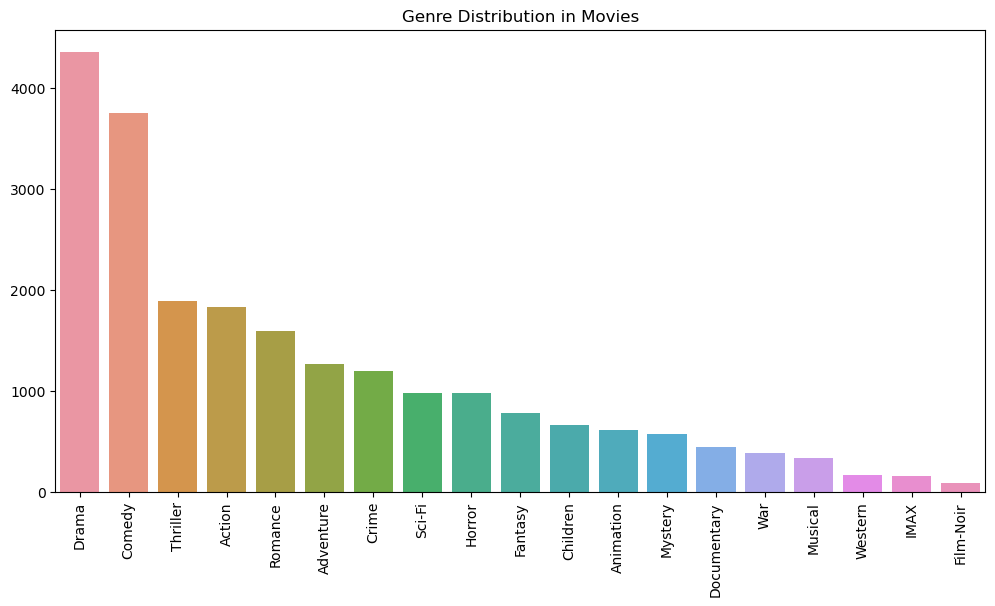

In [29]:
genre_columns = ['Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']

genre_counts = movies_df[genre_columns].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values)
plt.xticks(rotation=90)
plt.title('Genre Distribution in Movies')
plt.show()



C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


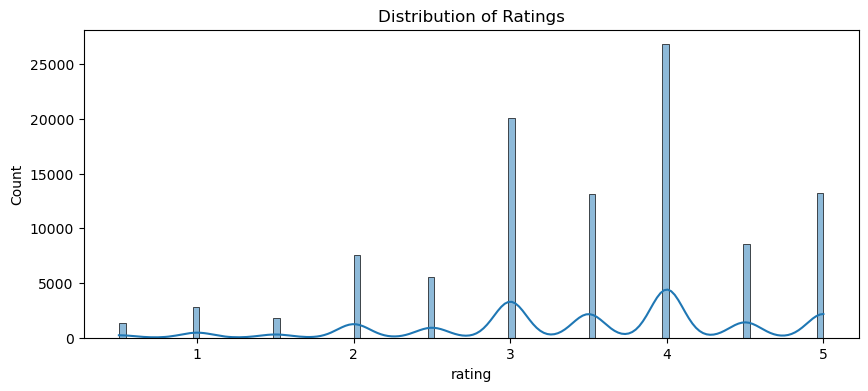

In [30]:
plt.figure(figsize=(10, 4))
sns.histplot(ratings_df['rating'], kde=True)
plt.title('Distribution of Ratings')
plt.show()




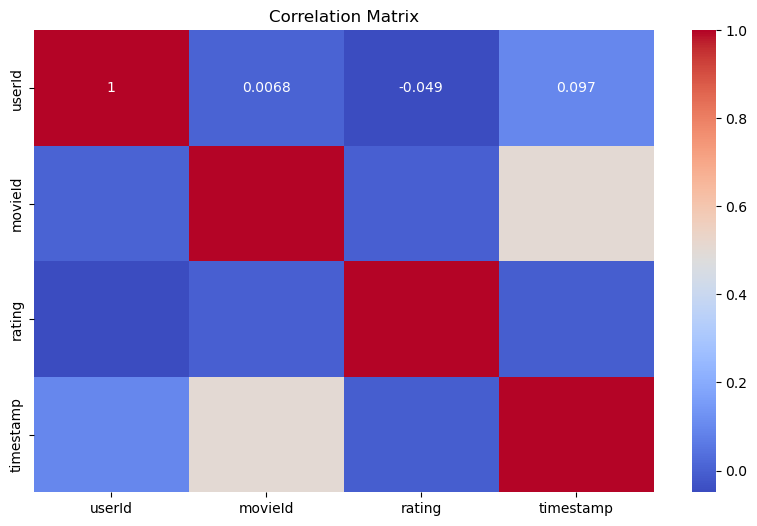

In [25]:
# Correlation matrix
plt.figure(figsize=(10, 6))
corr_matrix = ratings_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


C:\Users\Nicholas\AppData\Local\Temp\ipykernel_4876\1309709611.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.fillna(0, inplace=True)


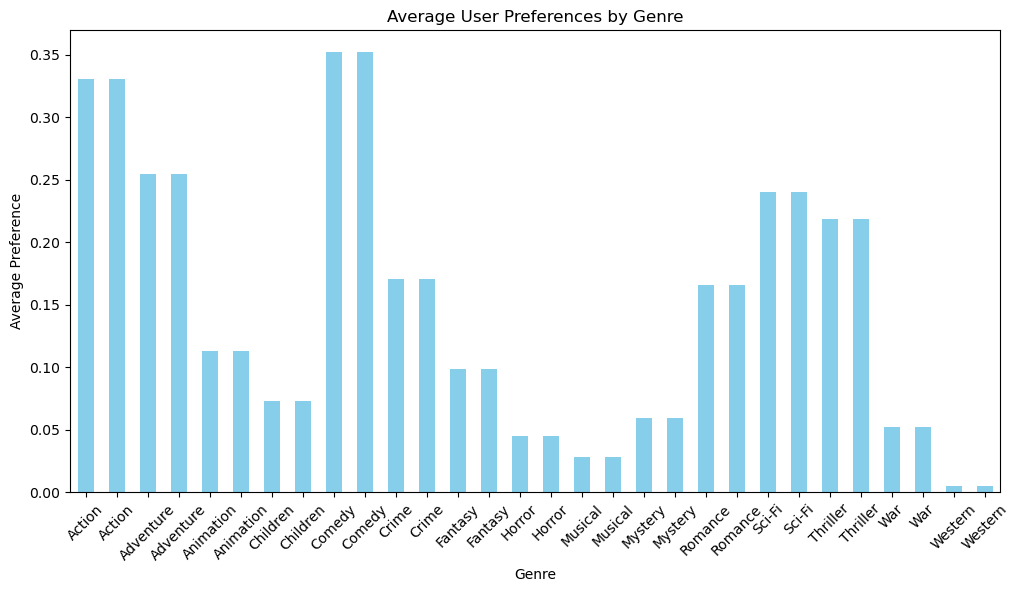

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# Select relevant columns
data = movies_tags_df[['userId', 'Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 
                       'Fantasy', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']]

# Replace NaN with 0 in genre columns
data.fillna(0, inplace=True)

# Calculate user preferences by averaging the genre columns
user_preferences = data.groupby('userId').mean().reset_index()

# Define genre columns
genre_columns = data.columns[1:]

# Set userId as the index
preferences = user_preferences.set_index('userId')

# Plotting user preferences for genres
preferences.mean().plot(kind='bar', figsize=(12, 6), color='skyblue')
plt.title('Average User Preferences by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Preference')
plt.xticks(rotation=45)
plt.show()


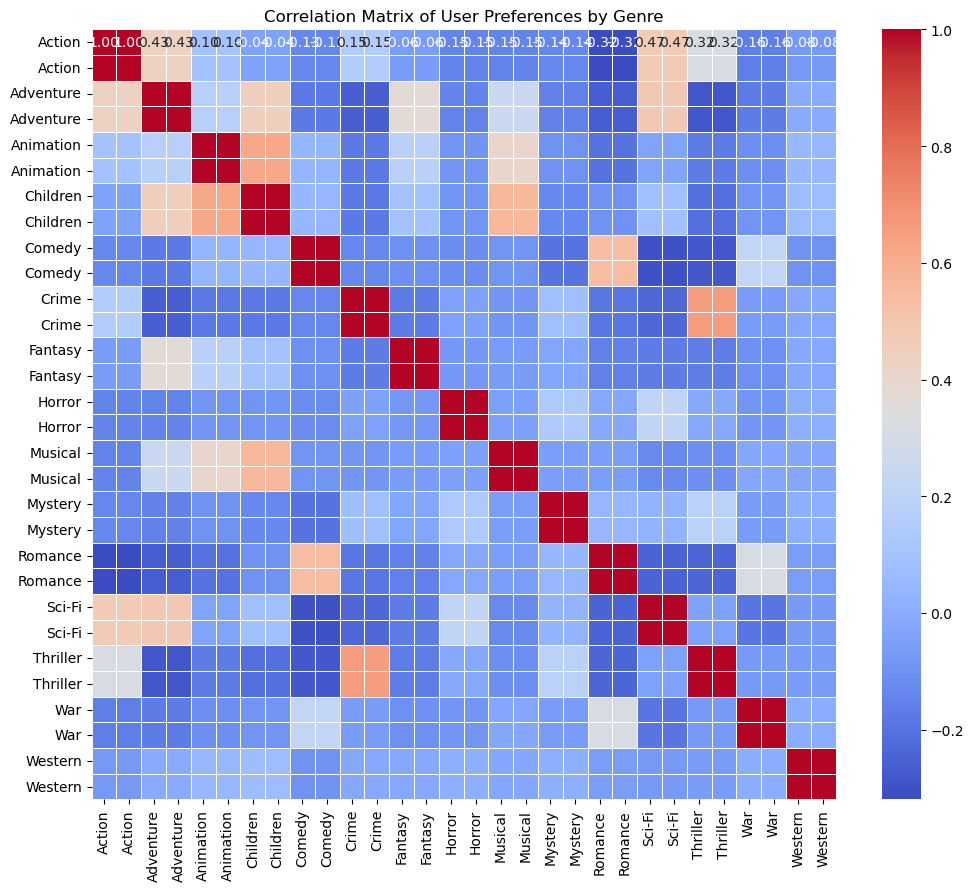

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = preferences.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of User Preferences by Genre')
plt.show()


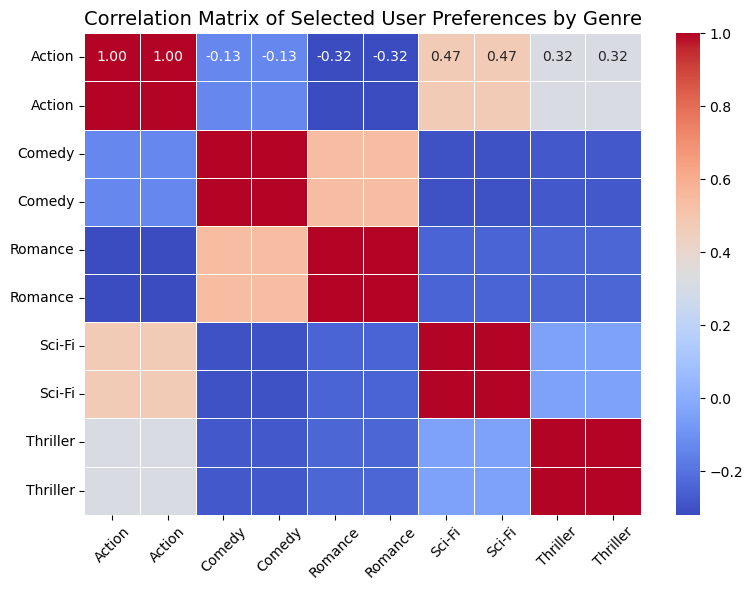

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix for a subset of genres
selected_genres = ['Action', 'Comedy', 'Romance', 'Sci-Fi', 'Thriller']
correlation_matrix = preferences[selected_genres].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, annot_kws={"size": 10})
plt.title('Correlation Matrix of Selected User Preferences by Genre', fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


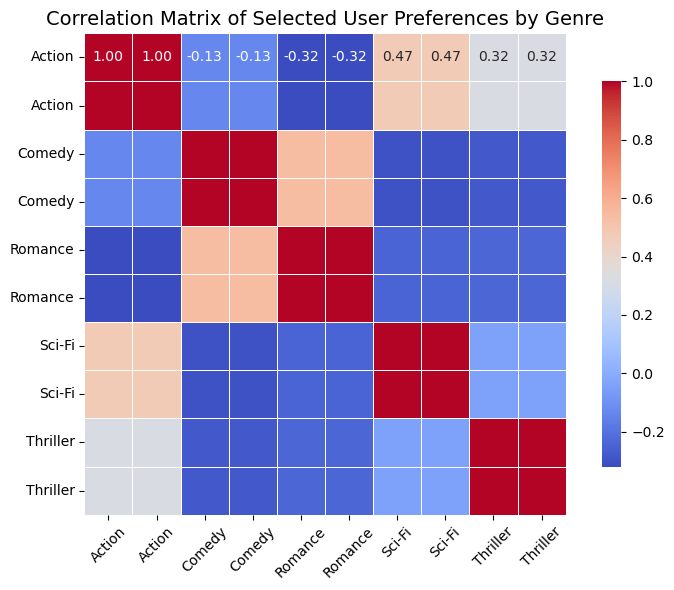

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix for a subset of genres
selected_genres = ['Action', 'Comedy', 'Romance', 'Sci-Fi', 'Thriller']
correlation_matrix = preferences[selected_genres].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, annot_kws={"size": 10}, 
            cbar_kws={'shrink': 0.8}, square=True)
plt.title('Correlation Matrix of Selected User Preferences by Genre', fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()



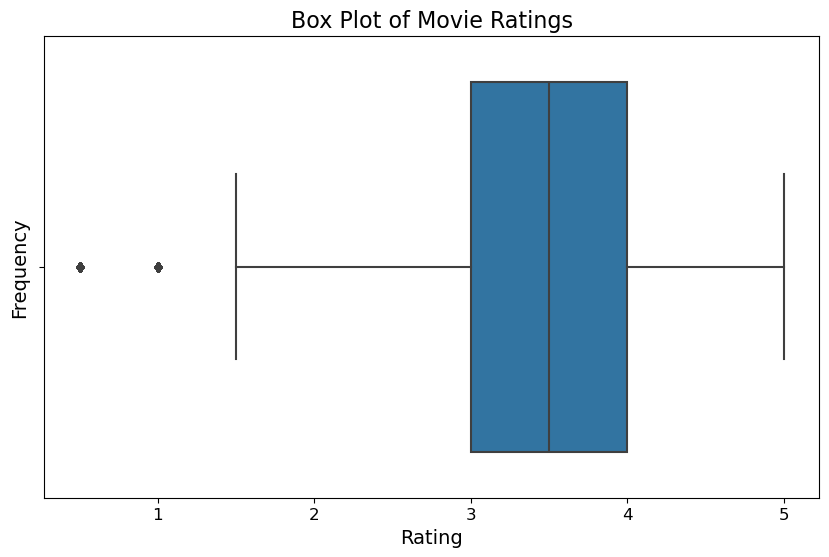

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting box plot to check for outliers in ratings
plt.figure(figsize=(10, 6))
sns.boxplot(x='rating', data=ratings_df)
plt.title('Box Plot of Movie Ratings', fontsize=16)
plt.xlabel('Rating', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()



In [38]:
# Merge ratings with movies to get titles
movies_ratings = pd.merge(ratings_df, movies_df, on='movieId')

# Calculate the average rating and the number of ratings for each movie
movie_stats = movies_ratings.groupby('title').agg({'rating': ['mean', 'count']}).reset_index()
movie_stats.columns = ['title', 'mean_rating', 'rating_count']

# Filter movies with at least 50 ratings to ensure statistical significance
popular_movies = movie_stats[movie_stats['rating_count'] >= 50]

# Get top 5 movies by average rating
top_5_movies = popular_movies.sort_values('mean_rating', ascending=False).head(5)
print("Top 5 Movies by Average Rating:")
print(top_5_movies[['title', 'mean_rating']])


Top 5 Movies by Average Rating:
                                                  title  mean_rating
7593                   Shawshank Redemption, The (1994)     4.429022
3499                              Godfather, The (1972)     4.289062
3011                                  Fight Club (1999)     4.272936
1961                              Cool Hand Luke (1967)     4.271930
2531  Dr. Strangelove or: How I Learned to Stop Worr...     4.268041


In [39]:
# Calculate the number of movies in each genre
genre_counts = movies_tags_df[genre_columns].sum().sort_values(ascending=False)

# Get top 5 genres
top_5_genres = genre_counts.head(5)
print("Top 5 Genres:")
print(top_5_genres)


Top 5 Genres:
Comedy      4391
Comedy      4391
Comedy      4391
Comedy      4391
Thriller    2696
dtype: int64


In [40]:
from sklearn.metrics.pairwise import cosine_similarity

# Create a user-item matrix
user_item_matrix = ratings_df.pivot(index='userId', columns='movieId', values='rating').fillna(0)

# Calculate cosine similarity between users
user_similarity = cosine_similarity(user_item_matrix)
user_similarity_df = pd.DataFrame(user_similarity, index=user_item_matrix.index, columns=user_item_matrix.index)

def recommend_movies(user_id, num_recommendations=5):
    # Get the similarity scores for the user
    similarity_scores = user_similarity_df[user_id]

    # Find similar users
    similar_users = similarity_scores.sort_values(ascending=False).index[1:]

    # Get the movies rated by similar users
    similar_user_ratings = user_item_matrix.loc[similar_users]

    # Calculate weighted average ratings
    weighted_ratings = similar_user_ratings.T.dot(similarity_scores.loc[similar_users])

    # Get the top movies not rated by the user
    user_ratings = user_item_matrix.loc[user_id]
    recommendations = weighted_ratings[user_ratings == 0].sort_values(ascending=False).head(num_recommendations)
    return movies_df[movies_df['movieId'].isin(recommendations.index)]

# Recommend top 5 movies for a given user
user_id = 1  # Example user ID
recommended_movies = recommend_movies(user_id)
print(f"Top 5 Recommended Movies for User {user_id}:")
print(recommended_movies[['title']])


Top 5 Recommended Movies for User 1:
                                                  title
277                    Shawshank Redemption, The (1994)
507                   Terminator 2: Judgment Day (1991)
659                               Godfather, The (1972)
2078                            Sixth Sense, The (1999)
3638  Lord of the Rings: The Fellowship of the Ring,...


In [42]:
import numpy as np

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = ratings_df['rating'].quantile(0.25)
Q3 = ratings_df['rating'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Determine the bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = ratings_df[(ratings_df['rating'] < lower_bound) | (ratings_df['rating'] > upper_bound)]
non_outliers = ratings_df[(ratings_df['rating'] >= lower_bound) & (ratings_df['rating'] <= upper_bound)]

# Count the number of outliers and non-outliers
outlier_count = len(outliers)
non_outlier_count = len(non_outliers)

print(f"Number of outliers: {outlier_count}")
print(f"Number of non-outliers: {non_outlier_count}")


Number of outliers: 4181
Number of non-outliers: 96655


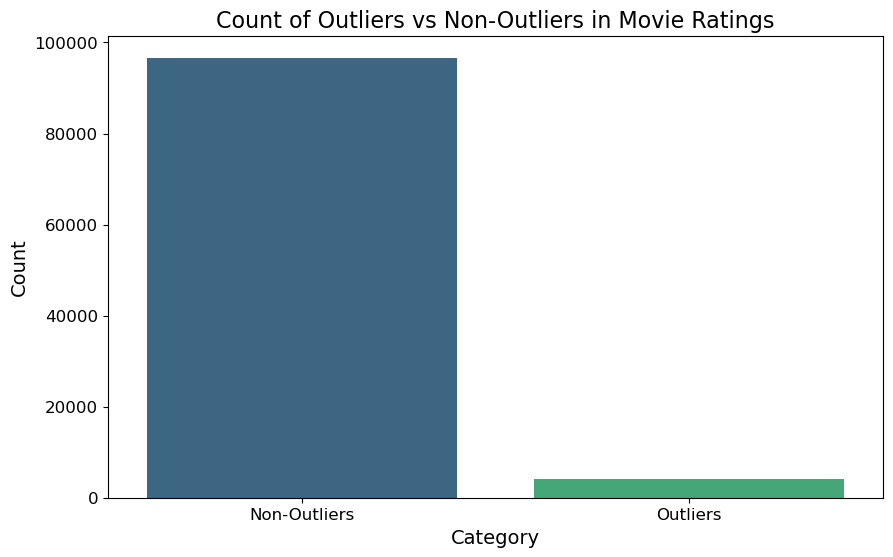

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

# Data for the bar graph
data = {'Category': ['Non-Outliers', 'Outliers'], 'Count': [non_outlier_count, outlier_count]}

# Create DataFrame for the bar graph
outlier_df = pd.DataFrame(data)

# Plotting the bar graph
plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Count', data=outlier_df, palette='viridis')
plt.title('Count of Outliers vs Non-Outliers in Movie Ratings', fontsize=16)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


In [44]:
# Load the datasets
movies_df = pd.read_csv('movies.csv')
ratings_df = pd.read_csv('ratings.csv')

# Calculate the number of ratings each movie has received
movie_rating_counts = ratings_df['movieId'].value_counts().reset_index()
movie_rating_counts.columns = ['movieId', 'rating_count']

# Merge with movies_df to get movie titles
movies_with_counts = pd.merge(movies_df, movie_rating_counts, on='movieId')

# Display the first few rows
print(movies_with_counts.head())


   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  rating_count  
0  Adventure|Animation|Children|Comedy|Fantasy           215  
1                   Adventure|Children|Fantasy           110  
2                               Comedy|Romance            52  
3                         Comedy|Drama|Romance             7  
4                                       Comedy            49  


In [46]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile) for rating counts
Q1 = movies_with_counts['rating_count'].quantile(0.25)
Q3 = movies_with_counts['rating_count'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Determine the bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = movies_with_counts[(movies_with_counts['rating_count'] < lower_bound) | (movies_with_counts['rating_count'] > upper_bound)]
non_outliers = movies_with_counts[(movies_with_counts['rating_count'] >= lower_bound) & (movies_with_counts['rating_count'] <= upper_bound)]

# Count the number of outliers and non-outliers
outlier_count = len(outliers)
non_outlier_count = len(non_outliers)

print(f"Number of outliers: {outlier_count}")
print(f"Number of non-outliers: {non_outlier_count}")


Number of outliers: 1179
Number of non-outliers: 8545


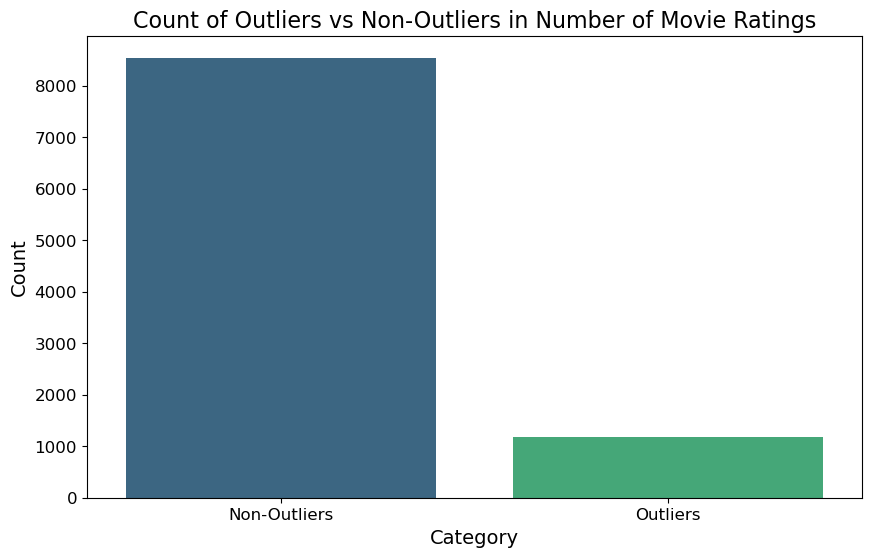

In [47]:
# Data for the bar graph
data = {'Category': ['Non-Outliers', 'Outliers'], 'Count': [non_outlier_count, outlier_count]}

# Create DataFrame for the bar graph
outlier_df = pd.DataFrame(data)

# Plotting the bar graph
plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Count', data=outlier_df, palette='viridis')
plt.title('Count of Outliers vs Non-Outliers in Number of Movie Ratings', fontsize=16)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()
